<h4><b>1. Imports and Setup</b></h4>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

<h4><b>2. Load dataset</b></h4>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
id_to_lbl = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
lbl_to_id = {lbl: id_ for id_, lbl in id_to_lbl.items()}

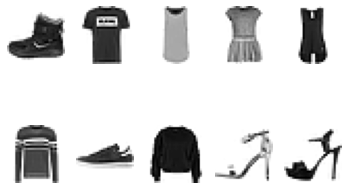

In [4]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="binary")
    plt.axis("off")

<h4><b>3. Prepare Dataset</b></h4>

In [5]:
x_valid, y_valid = x_train[50_000:], y_train[50_000:]
x_train, y_train = x_train[:50_000], y_train[:50_000]

# scaling 
x_train = x_train / 255.0
x_test  = x_test  / 255.0
x_valid = x_valid / 255.0

<h4><b>4. Build the Model</b></h4>

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers

<h4><b>5. Compile and train the model.</b></h4>

In [8]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy, 
    optimizer=keras.optimizers.SGD(), 
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

In [10]:
history = model.fit(
    x=x_train, y=y_train,
    batch_size=32,
    validation_data=(x_valid, y_valid),
    epochs=20,
)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 0.7512 - sparse_categorical_accuracy: 0.7545 - val_loss: 0.6366 - val_sparse_categorical_accuracy: 0.7768
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4971 - sparse_categorical_accuracy: 0.8292 - val_loss: 0.4879 - val_sparse_categorical_accuracy: 0.8314
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4512 - sparse_categorical_accuracy: 0.8418 - val_loss: 0.4475 - val_sparse_categorical_accuracy: 0.8446
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.8524 - val_loss: 0.4291 - val_sparse_categorical_accuracy: 0.8465
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4031 - sparse_categorical_accuracy: 0.8595 - val_loss: 0.4172 - val_sparse_categorical_accuracy: 0.8545
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3861 - spars

<h4><b>6. Visualize the learning Curve.</b></h4>

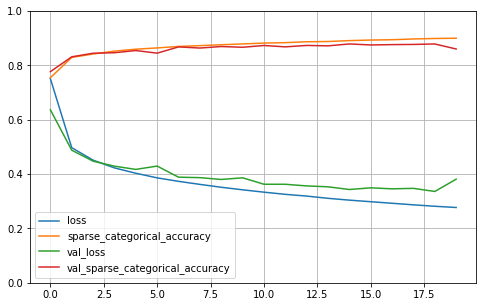

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h4><b>7. Evaluate the Model</b></h4>

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4017 - sparse_categorical_accuracy: 0.8547


[0.401671439409256, 0.8547000288963318]

<h4><b>8. Save the trained Model</b></h4>

In [13]:
model.save("fashion_mnist_classifier.h5")

<h4><b>9. Make Prediction</b></h4>

In [14]:
x_new = x_test[:3, :]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)